# GRIP The Spark Foundation (Task 5)

# Traffic Sign Recognition

# NAME:Padmasandhiya P

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random
import os
from tensorflow import keras 
import matplotlib.image as mpimg
import cv2,random
from PIL import Image

In [4]:
path = "C:/Users/ranbir/Traffic Sign Data/Train"

NUM_CATEGORIES = len(os.listdir(path))
img_data = []
img_names = []
for i in range(len(os.listdir(path))):
    main = os.path.join(path,str(i))
    imagefile_names = os.listdir(main)
    for j in imagefile_names:
        img = cv2.imread(main + '/' + j,cv2.IMREAD_UNCHANGED)
        if img is None:
            break
        else:
            img = cv2.resize(img,(30,30),interpolation = cv2.INTER_NEAREST)
            img = np.array(img)
            img_data.append(img)
            img_names.append(i)
im_data = np.array(img_data)
im_label = np.array(img_names)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(im_data,im_label,test_size = 0.15,random_state = 155)

x_train = x_train/255
x_test = x_test/255

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(33327, 43)
(5882, 43)


In [6]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization ,MaxPool2D
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
from tensorflow.keras.models import Sequential, load_model

In [27]:
def create():
    def add_conv_block(model , num_filters):
        model.add(Conv2D(num_filters , 3 , activation = 'relu' , padding  = 'same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters , 3 , activation = 'relu'))
        model.add(MaxPooling2D(pool_size = 2))
        model.add(Dropout(0.2))
        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape = (30,30,3)))
    
    model = add_conv_block(model ,32)
    model = add_conv_block(model , 64)
    model = add_conv_block(model , 128)
    model.add(Flatten())
    model.add(Dense(43 , activation = 'softmax'))
    model.compile(
    loss = 'categorical_crossentropy' , 
    optimizer = 'adam' , metrics = ["accuracy"]
    )
    return model

In [28]:
model = create()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_13 (Batc (None, 14, 14, 64)       

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

In [63]:
batch_size = 43
epochs = 10

history = model.fit(aug.flow(x_train,y_train,batch_size=batch_size),
                    epochs=epochs, validation_data=(x_test, y_test))

Train for 776 steps, validate on 5882 samples
Epoch 1/10
776/776 [==============================] - 154s 198ms/step - loss: 0.1200 - accuracy: 0.9601 - val_loss: 0.1507 - val_accuracy: 0.9600
Epoch 2/10
776/776 [==============================] - 155s 200ms/step - loss: 0.1134 - accuracy: 0.9653 - val_loss: 0.0324 - val_accuracy: 0.9898
Epoch 3/10
776/776 [==============================] - 154s 198ms/step - loss: 0.0835 - accuracy: 0.9737 - val_loss: 0.0535 - val_accuracy: 0.9838
Epoch 4/10
776/776 [==============================] - 156s 201ms/step - loss: 0.0764 - accuracy: 0.9756 - val_loss: 0.0390 - val_accuracy: 0.9874
Epoch 5/10
776/776 [==============================] - 160s 206ms/step - loss: 0.0741 - accuracy: 0.9784 - val_loss: 0.0437 - val_accuracy: 0.9866
Epoch 6/10
776/776 [==============================] - 158s 204ms/step - loss: 0.0703 - accuracy: 0.9780 - val_loss: 0.0441 - val_accuracy: 0.9886
Epoch 7/10
776/776 [==============================] - 156s 201ms/step - loss: 

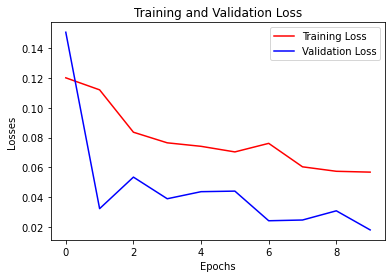

In [73]:
loss_t = history.history['loss']
loss_val =  history.history['val_loss']
epochs = range(10)
plt.plot(epochs,loss_t,'r',label = "Training Loss")
plt.plot(epochs,loss_val,'b',label = "Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()

In [ ]:
history.score

In [10]:
model.save('Traffic_CNN.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Traffic_CNN.model\assets


In [7]:
from tensorflow.keras.models import load_model
model = load_model('Traffic_CNN.model')
model = tf.keras.models.load_model('Traffic_CNN.model')
preds = model.predict(x_test/255.)
print(preds[1])

[1.5722591e-04 1.3198091e-03 3.0413489e-03 1.6302332e-02 7.9140300e-03
 5.2479874e-02 1.0994539e-03 3.6984533e-02 1.1644070e-02 2.7220414e-03
 3.1027308e-02 1.3171823e-02 1.8545603e-02 4.1711326e-03 4.5685170e-04
 1.3198159e-04 3.0592859e-03 2.1633083e-02 2.2859715e-02 1.8597530e-01
 2.7245523e-02 8.3541453e-02 4.5368178e-03 3.0215457e-02 4.7255549e-04
 3.4219027e-03 3.7033374e-03 4.7057041e-04 5.1471088e-03 3.6740201e-04
 1.7480016e-01 5.4472391e-03 3.1845476e-03 8.1735998e-03 1.1680088e-02
 1.6554052e-02 2.1035090e-02 6.6882116e-04 3.3243414e-02 2.5287099e-04
 5.8936473e-02 1.0811524e-04 7.2096333e-02]


In [8]:
from tensorflow.keras.models import load_model
model = load_model('Traffic_CNN.model')

def model_testing(test_file):
    test_data = pd.read_csv(test_file)
    class_id = test_data['ClassId'].values
    path = test_data['Path'].values
    image_file = []
    for images in path:
        img = Image.open("C:/Users/ranbir/Traffic Sign Data/" + images)
        img = img.resize((30,30))
        img = np.array(img)
        image_file.append(img)
    image_file = np.array(image_file)
    return image_file,class_id

x_testing ,labels = model_testing("C:/Users/ranbir/Traffic Sign Data/Test.csv")
pred = model.predict_classes(x_testing/255.)
prob_val = model.predict(x_testing/255.)

In [9]:
pred[11]
prob_val[11]

array([6.2838477e-13, 4.3803638e-08, 2.2349528e-10, 1.4619045e-13,
       9.9299222e-11, 3.3427995e-07, 3.3341438e-10, 9.9999928e-01,
       2.8259501e-07, 6.4015189e-13, 7.5366458e-10, 4.5008574e-15,
       1.3364826e-13, 1.0259420e-15, 5.9006944e-14, 3.4308217e-13,
       1.5307807e-09, 1.8733189e-11, 1.4093960e-16, 2.3687382e-15,
       2.4080789e-15, 4.2147158e-16, 6.7361111e-20, 1.7508683e-14,
       9.1393690e-17, 7.3469469e-15, 2.1641511e-17, 3.5802264e-19,
       9.5106209e-17, 5.9398487e-16, 1.3952811e-13, 1.8266272e-12,
       4.6998421e-18, 1.8444904e-11, 1.5743637e-11, 3.4827081e-14,
       1.8254585e-14, 1.2305142e-13, 2.7885431e-12, 5.4707410e-12,
       6.0363938e-08, 4.2377723e-15, 3.5412190e-10], dtype=float32)

Enter the Image no : 17


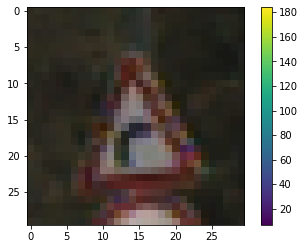

The given Traffic Sign is Dangerous curve to the right


'Dangerous curve to the right'

In [11]:
final_labels = [ 'Speed limit (20km/h)'
    ,'Speed limit (30km/h)'
    , 'Speed limit (50km/h)'
    , 'Speed limit (60km/h)'
    , 'Speed limit (70km/h)'
    , 'Speed limit (80km/h)'
    , 'End of speed limit (80km/h)'
    , 'Speed limit (100km/h)'
    , 'Speed limit (120km/h)'
    , "No passing" 
    , 'No passing for vehicles over 3.5 metric tons'
    , 'Right-of-way at the next intersection'
    , 'Priority road'
    ,'Yield'
    , 'Stop' ,'No vehicles'
    ,'Vehicles over 3.5 metric tons prohibited'
    , 'No entry'
    , 'General caution'
    , 'Dangerous curve to the left'
    , 'Dangerous curve to the right'
    , 'Double curve'
    , 'Bumpy road'
    ,'Slippery road'
    , 'Road narrows on the right'
    , 'Road work'
    , 'Traffic signals'
    , 'Pedestrians'
    , 'Children crossing'
    , 'Bicycles crossing'
    , 'Beware of ice/snow'
    , 'Wild animals crossing'
    , 'End of all speed and passing limits'
    , 'Turn right ahead'
    ,'Turn left ahead'
    , 'Ahead only'
    ,'Go straight or right'
    , 'Go straight or left'
    ,'Keep right'
    , 'Keep left'
    , 'Roundabout mandatory'
    , 'End of no passing'
    , 'End of no passing by vehicles over 3.5 metric tons']

def array_index():
    x = int(input("Enter the Image no : "))
    req_val = pred[x] 
    plt.figure()
    plt.imshow(x_testing[x])
    plt.colorbar()
    plt.show()
    print("The given Traffic Sign is",final_labels[req_val])
    return final_labels[req_val]

            
array_index()